<div dir="rtl" style="text-align: right;">
<h1>ناهنجاری‌ها</h1>

<h2>ناهنجاری چیست؟</h2>
<p>یکی دیگر از زمینه‌های پاک‌سازیداده می‌تواند کار با ناهنجاری‌ها باشد. ابتدا، چگونه یک ناهنجاری را تعریف می‌کنید؟ این می‌تواند به دانش زمینه‌ای و اطلاعات دیگر نیاز داشته باشد، اما یک راه ساده برای شروع، نگاه کردن به نمودارهای جعبه‌ای است:</p>
<p>نمودار جعبه‌ای ساعت‌های کار در هفته</p>

</div>

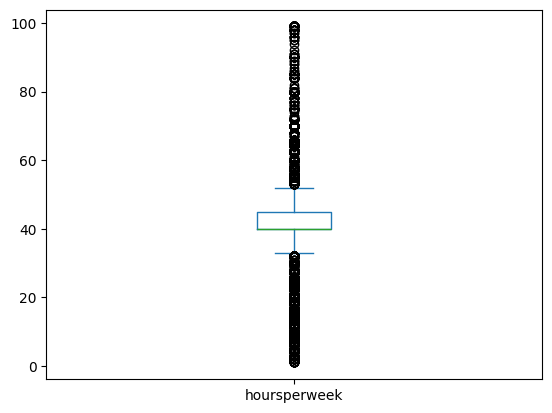

In [10]:
import pandas as pd

# 
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race',
        'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'label']
train_df = pd.read_csv("statics/data/02_08_01_adult.data", header=None, names=names)

# نمودار جعبه‌ای ساعات کار در هفته
bbox = train_df['hoursperweek'].plot(kind="box")


<div dir="rtl" style="text-align: right;">



<h2>شناسایی ناهنجاری</h2>
<p>در اینجا، هر چیزی خارج از ویسکرز
(whiskers)
 می‌تواند به عنوان یک ناهنجاری در نظر گرفته شود. به عنوان یک مرور، ویسکرز خطوطی هستند که از جعبه بیرون زده و ۱.۵ برابر محدوده چارک اول و سوم هستند به عبارتی فاصله بین درصدهای ۲۵ و ر۷۵ داده است.</p>
 <p>اینجا نمونه کدی برای شناسایی ناهنجاری‌ها آورده شده است.</p>


</div>

In [9]:
q_df = train_df.quantile([.25, .75], numeric_only=True)
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25] # دامنه میان چارکی
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
0.25,28.0,117827.0,9.0,0.0,0.0,40.0
0.75,48.0,237051.0,12.0,0.0,0.0,45.0
iqr,20.0,119224.0,3.0,0.0,0.0,5.0
whisker_length,30.0,178836.0,4.5,0.0,0.0,7.5
max_whisker,78.0,415887.0,16.5,0.0,0.0,52.5
min_whisker,-2.0,-61009.0,4.5,0.0,0.0,32.5


<div dir="rtl" style="text-align: right;">

<h2>حذف ناهنجاری</h2>
<p>پس از اینکه برخی ناهنجاری‌ها را پیدا کرده‌ایم، باید چه کاری انجام دهیم؟</p>

<p>مانند داده‌های گمشده، باید از خود بپرسید، چرا این ناهنجاری‌ها وجود دارند؟ اگر آن‌ها واقعاً بخشی از داده‌های شما هستند، احتمالاً می‌خواهید آن‌ها را نگه دارید. با حذف آن‌ها، داده‌های شما از حقیقت دور می‌شوند. اگر آن‌ها اشتباه هستند، به عنوان مثال، برای سن‌های بیش از ۵۰۰، می‌توانید تقریبا مطمئن باشید که داده‌های درستی نیستند و این ردیف‌ها را حذف کنید اگر داده‌های کافی دارید یا شاید یک مقدار بهتر وارد کنید. یا حتی بهتر، سعی کنید کشف کنید که چگونه این مقادیر بد به وجود آمده‌اند و آن‌ها را اصلاح کنید. ممکن است 
pipeline
 داده‌های شما مشکل داشته باشد، اما داده‌های خام هنوز خوب هستند.</p>
<p>در نهایت، همیشه خوب است که فرایند تولید داده را در نظر بگیرید. آیا داده‌های شما از یک نمونه می‌آیند؟ اگر بله، شاید نماینده خوبی نباشد، بنابراین چیزهایی که به نظر ناهنجاری‌ها در نمونه شما می‌آیند، در واقع در جمعیت نیستند.</p>
<p>عوامل زیادی برای در نظر گرفتن وجود دارد و این‌ها فقط برخی از آن‌ها هستند. نکته اصلی این است که از ناهنجاری‌های خود آگاه باشید، نادیده گرفتن یا حذف آن‌ها بدون فکر معمولاً بهترین ایده نیست.</p>
</div>